# 결정트리
> 결정트리는 분류와 회귀, 다중출력도 가능하고 매우 복잡한 데이터셋도 학습할 수 있는 매우 강력한 알고리즘이다.  이는 최근 가장 강력한 머신러닝중 하나인 랜덤포레스트의 기본 구성요소이기도 하다.   
---
# 장점과 단점
* 장점 : 훈련 데이터에 대한 제약사항이 거의 없으며 속도가 매우 빠르다. 또한, 이해하기가 쉽고 간단하게 시각화가 된다.
* 단점 : 계단 모양의 결정 경계를 만드므로 훈련세트의 회전에 민감하다. 또, 훈련데이터의 작은 변화에도 매우 민감하기에 같은 데이터에서 다른모델을 얻을 수 있다.
![image](https://user-images.githubusercontent.com/62787572/130947189-fd0f9216-8010-4b5f-8259-b11b6674cf42.png)
### 결정트리 학습과 시각화
> sklearn에서 결정트리는 graphviz를 통해 쉽게 시각화 할수있다.

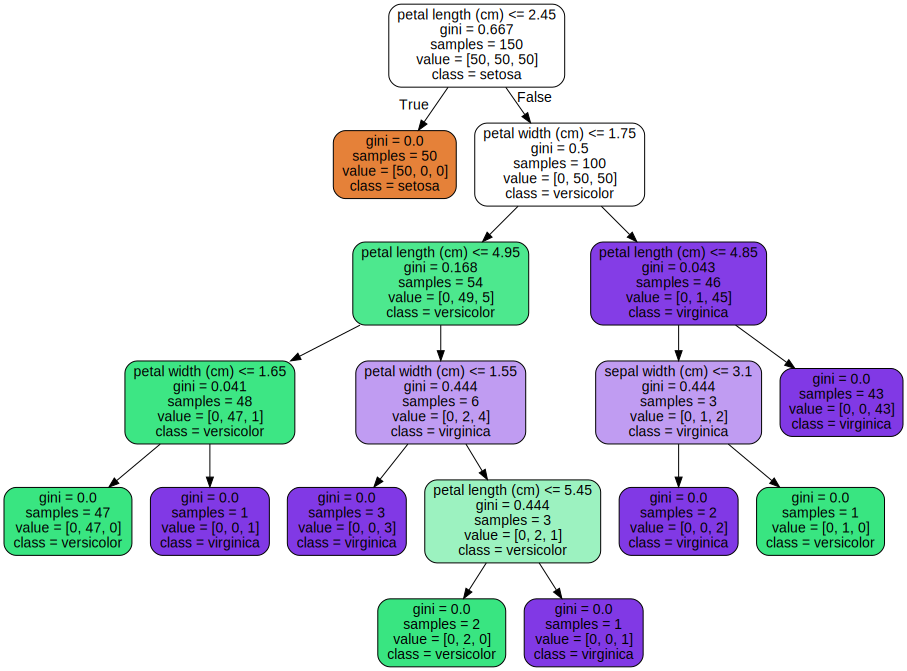

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
import graphviz
dtc=DecisionTreeClassifier(max_depth=5) # 트리 노드의 최대 깊이
iris=load_iris()
x=iris.data
y=iris.target

dtc.fit(x,y)
dtc.predict([[5.1,3.2,3.3,4.4]])
# 시각화를 위한 graphviz
from sklearn.tree import export_graphviz
export_graphviz(dtc,
                out_file="iris_tree.dot",
                feature_names=iris.feature_names,
                class_names=iris.target_names,
                rounded=True,
                filled=True
                )
with open("iris_tree.dot") as f :
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 예측하기
> 위 그림에서 트리는 루트노드(꼭대기의 노드)에서 각 조건에 부합하면 오른쪽, 부합하지 않으면 왼쪽으로 가는 식으로 세분화 된 예측을 만든다.   
> 루트노드에서 petal length가 2.45보다 적다면 왼쪽노드로 가서 setosa라는 결론을 내리고 이는 추가적인 검사가 필요하지 않다.   
---
##### 불순도
> 마지막 노드의 gini속성은 불순도, 즉 다른 결과값이 끼어있는 정도를 보인다. 불순도가 높으면 결과값중 일치하지 않는 결과가 있다는 의미이므로 긍정적이지 않다.
>> 불순도측정은 gini와 entropy의 계수가 있다.
---
### 클래스 확률 추정
> k에 속할 확률을 추정할 수도 있다.   
> 예를들어 [5.1, 3.5, 1.4, 0.2]의 속성을 가진 data가 어느 클래스에 속할지 확률을 뽑아내 보자.

In [10]:
dtc.predict_proba([[5.1, 3.5, 1.4, 0.2]]),dtc.predict([[5.1, 3.5, 1.4, 0.2]])

(array([[1., 0., 0.]]), array([0]))

> 위 결과는 class(0) versicolor일 확률을 100%로 추정했다.
---
### 계산 복잡도
> 예측을 위해서는 루트 노드에서부터 리프 노드까지 탐색해야 하므로 O(log2(m))의 복잡도를 가진다.
---
### 규제 매개변수
> 과대적합을 피하기 위해 자유도를 제한할 필요가 있다.   
> * max_depth(모델의 최대 깊이)
> * min_samples_split(분할되기 위해 노드가 가져야하는 최소 샘플 수)
> * max_leaf_nodes(리프 노드의 최대 수)
---
## 회귀
> DecisionTreeRegressor를 사용하면 결정트리 회귀 모형을 만들 수 있다.

# 연습문제
1. 백만 개의 샘플을 가진 세트의 결정트리 깊이는?
> 결정트리는 log2(m)개의 제한이 없을때의 리프노드 개수를 가진다. 따라서 log2(l0^6)은 대략 20이므로 20이다.
---
2. 한 노드의 지니 불순도가 보통 그 부모 노드보다 작을것인가?
> 지니 불순도는 다른 데이터를 가질수록 커지므로 부모노드가 불순도가 더 클 것이다.
---
3. 결정트리가 훈련 세트에 과대적합 되었다면 Max_depth를 줄이는 것이 좋은가?
> 깊이가 커질수록 노드의 수가 많아지니 과대적합이 될 것이다. 따라서 규제를 가해 줄이는 것이 좋다.
---
4. 결정트리가 과소적합이 되었다면 입력 특성의 스케일을 조정하는 것이 좋을것인가?
> 결정트리는 스케일링 등의 변수에 영향을 받지 않는다. 변화에 민감하지만 과소적합때에 스케일의 차이가 그 이유가되지는 않는다.
---
5. 백만 개의 훈련 세트 훈련에 한시간이 걸렸다면 천만 개의 샘플은 얼마나 걸릴 것인가?
> 훈련 시 결정트리의 계산 복잡도는 n(features)*mlog2(m)이다. 100만개에 한시간이 걸렸다면 1000만개에는 대략 10~12시간 정도가 걸릴 것이다.
---
6. 십만 개의 샘플을 가진 훈련 세트가 있다면 presort=True로 지정하는것이 속도를 높일 것인가?
> presort는 미리 정렬을 할 지에 대한 변수이다. 10만개면 nlogn이상의 시간이 추가되므로 정렬하는 시간이 매우 길게 걸릴 수가 있다.
---
7. 다음 단계에 따라 Monn 데이터셋을 튜닝하라.
> a.make_moons(n_samples=1000,noise=0.4)를 사용해 데이터셋 형성.  
b. 이를 train_test_split()을  사용해 나눔.   
c. DecisionTreeClassifier의 최적의 매개변수를 찾기 위해 교차 검증과 함께 그리드 탐색을 수행한다.   
d. 찾은 매개변수를 사용해 전체 훈련세트의 대해 모델을 훈련시키고 테스트 세트에서 성능을 측정한다.

In [16]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
#a
x, y = make_moons(n_samples=1000, noise=0.4, random_state=0)
#b
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
#c
param_grid={'max_leaf_nodes': [i for i in range(1,50,2)],
            'min_samples_split' : [1,2,3,4,5]
            }
decision=DecisionTreeClassifier()
grid=GridSearchCV.fit(decision,param_grid,n_jobs=-1)
grid.fit(x_train,y_train)

AttributeError: ignored

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
x,y=datasets.make_moons(n_samples=1000,noise=0.4)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
decision=DecisionTreeClassifier()
parameter={'max_leaf_nodes': list(range(2,100)),'max_depth':list(range(1,5))}
grid=GridSearchCV(decision,parameter)
grid.fit(x_train,y_train)
grid.best_params_

{'max_depth': 2, 'max_leaf_nodes': 4}

In [ ]:
best_de=DecisionTreeClassifier(max_depth=2,max_leaf_nodes=4)
best_de.fit(x_train,y_train)
best_de.score(x_test,y_test)

0.84

In [ ]:
from sklearn.model_selection import ShuffleSplit
rs = ShuffleSplit(n_splits=1000, test_size=len(x_train)-100)
rs.split(x_train)
mini_sets=[]
for mini_train_index,mini_test_index in rs.split(x_train):
  x_mini_train=x_train[mini_train_index]
  y_mini_train=y_train[mini_train_index]
  mini_sets.append((x_mini_train,y_mini_train))

In [ ]:
clf=[]
result_score=[]
for i in range(1000):
  clf.append(DecisionTreeClassifier(max_depth=2,max_leaf_nodes=4))
  clf[i].fit(mini_sets[i][0],mini_sets[i][1])
  result_score.append(clf[i].score(x_test,y_test))
np.mean(result_score)


0.817815